<a href="https://colab.research.google.com/github/readikus/coursera-machine-learning-andrew-ng-python-algorithms/blob/master/01_Linear_Regression_with_a_single_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we are going to look at implementing one of the easiest-to-follow machine learning algorithms: linear regression with a single variable.

We will be implementing as much of this algorithm as possible, so we understand how it works, rather than just calling an existing library with the input file. Understanding linear regression is a great introduction to other machine learning algorithms and models, such as neural networks.

Linear regression allows us to make a prediction based on a single or multiple values, when there is a clear relationship between them. For example, if you're going on a long car journey, the number of miles you travel will roughly correspond to the litres of fuel your car uses. As the mileage goes up, so does the amount of fuel.

We will implement an algorithm that can "learn" such relationship based on training examples, and produce a "model". [Andrew Ng's Machine Learning course](https://www.coursera.org/learn/machine-learning) on Coursera gives a detailed introduction to the theory behind this algorithm.

# Import the data set and visualise it

For this piece, we are looking at the popular problem of estimating house price based on the size of the house (measured in square footage).

A simple data set is included in comments for testing the algorthm works.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# load the sample data for house prices in Portland
url = 'https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df = pd.read_csv(url, header=None, names=["square_footage", "rooms", "price"])

# initialize list of lists 
#data = [[1, 12], [4, 18], [12, 34]]
# Create the pandas DataFrame 
#df = pd.DataFrame(data, columns = ['square_footage', 'price']) 
  
#actual_theta_0 = 10
#actual_theta_1 = 2

# Visualise the data

The first stage will be to visualise our data for square footage vs price. This lets us get a feel for the data. We can see that as square footage goes up, so does price. Generally that relationship follows a pattern - a line - so we call this a _linear relationship_.

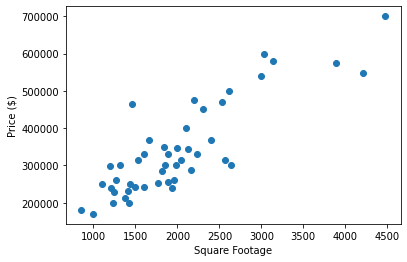

In [3]:
def scatter_plot(feature, label, x_label, y_label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Render the scatter plot and the red line.
    plt.show()

scatter_plot(df['square_footage'].tolist(), df['price'].tolist(), 'Square Footage', 'Price ($)') 

We can see in the plot above that as Square Footage increases, so does price. The plot also shows that this is not completely accurate, but shows a clearly trend.

Processing data in `Panda's dataframes` and visualising with `matplotlib` are key skills for data science.


In [4]:
head = df.head()
print(head)

   square_footage  rooms   price
0            2104      3  399900
1            1600      3  329900
2            2400      3  369000
3            1416      2  232000
4            3000      4  539900


# Feature scaling

This is the bit that gets missed from a lot of tutorials, and leads to numerical overflow issues. Important for making the data fit within a range.

When squaring numbers, large numbers can get very large and lead to numerical overflow. So instead, subtract the mean and divide by standard deviation to get a number closer to 0.

Important to unscale at the end - i.e. theta_x = theta_x * std + mean


In [6]:
mean_square_footage = df['square_footage'].mean()
std_square_footage = df['square_footage'].std()

print('mean_square_footage')
print(mean_square_footage)

df['square_footage'] =  (df['square_footage'] - mean_square_footage) / (std_square_footage) 

head = df.head()
print(head)


mean_square_footage
1.8897413185109047e-17
   square_footage  rooms   price
0        0.130010      3  399900
1       -0.504190      3  329900
2        0.502476      3  369000
3       -0.735723      2  232000
4        1.257476      4  539900


# Setup the MSE function for calculating loss

This takes the theta values, and computes the mean squared error for the given x/y values. Which basically records how well the two parameters for a straight line "fits" the data.

In [8]:
def mean_squared_error(x, y, theta_0, theta_1):
    """
    Cost function to calculate the average error of using the respective values
    for theta_0 and theta_1 for predicting y based on x. The squared value is 
    commonly used to handle +/- values the same.
    """
    sum = 0
    for i in range(len(x)):
        sum = sum + (y[i] - h(x[i], theta_0, theta_1))**2

    return round(sum / len(x))

#print('validating the mean squared error....')
#print(mean_squared_error(df['square_footage'].tolist(), df['price'].tolist(), actual_theta_0, actual_theta_1))


# Set up the prediction function, h

In [1]:
def h(x_i, theta_0, theta_1):
    """
    The "hypthosis" - this is our prediction function, that takes the x and the
    model values 
    Assumes the following prediction function:

    h(x) = theta_0 + (theta_1 * x)
    """
    return theta_0 + (theta_1 * x_i)

# Picking values for theta...

This is where it gets interesting - I understood the cost function (mean squared error) and what was going on, but how we get started thinking about what values to iterate over, and guide to find that we a better value for theta_0 and theta_1 than before?

Implemented as a recursive function, to reduce code.

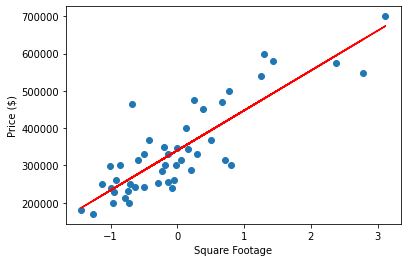

In [ ]:
def scatter_plot_with_line(feature, label, x_label, y_label, theta_0, theta_1):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Plot the feature values vs. label values.
    plt.scatter(feature.tolist(), label)

    x = np.append([0], feature.to_numpy())# [feature.min(), feature.max()]
    line_y = theta_0 + x * theta_1
    plt.plot(x, line_y, '-r', label='y=2x+1')

    # Render the scatter plot and the red line.
    plt.show()

scatter_plot_with_line(df['square_footage'], df['price'].tolist(), 'Square Footage', 'Price ($)', 340403, 106903)

0
temp_theta_0
34041.26595744681
temp_theta_1
10463.293376618247
COST
131183096213
1
temp_theta_0
64678.40531914894
temp_theta_1
19902.519741907898
COST
107083248898
2
temp_theta_0
92251.83074468083
temp_theta_1
28417.90693102027
COST
87554481423
3
temp_theta_0
117067.91362765955
temp_theta_1
36099.87324630462
COST
71729635939
4
temp_theta_0
139402.3882223404
temp_theta_1
43029.987539241985
COST
58906204147
5
temp_theta_0
159503.41535755317
temp_theta_1
49281.83532691314
COST
48514942305
6
temp_theta_0
177594.33977924465
temp_theta_1
54921.80013962074
COST
40094481742
7
temp_theta_0
193876.17175876698
temp_theta_1
60009.768396191
COST
33271086891
8
temp_theta_0
208529.8205403371
temp_theta_1
64599.76529147991
COST
27741830347
9
temp_theta_0
221718.1044437502
temp_theta_1
68740.52844808098
COST
23261240896
10
temp_theta_0
233587.559956822
temp_theta_1
72476.02542339769
COST
19630397985
11
temp_theta_0
244270.0699185866
temp_theta_1
75845.92056708765
COST
16688181484
12
temp_theta_0
2538

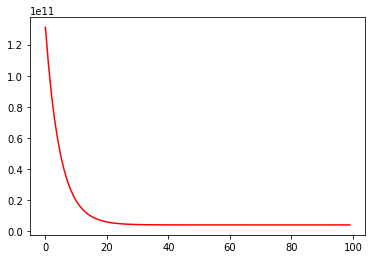

theta_0
340403.61773803073


In [ ]:
def mse_diff_theta_0(x, y, theta_0, theta_1):
    sum = 0
    for i in range(len(x)):
        sum = sum + (h(x[i], theta_0, theta_1) - y[i])
    return (1/len(x)) * sum

def mse_diff_theta_1(x, y, theta_0, theta_1):
    sum = 0
    for i in range(len(x)):
        loss = (h(x[i], theta_0, theta_1) - y[i])
        sum = sum + (loss * x[i])

    return (1/len(x)) * sum

def gradient_descent_single(x, y, alpha = 0.01, theta_0 = 0, theta_1 = 0, iterations = 100):

    cost_history = []
    theta_history = []

    for it in range(iterations):
        temp_theta_0 = theta_0 - (alpha * mse_diff_theta_0(x, y, theta_0, theta_1))
        temp_theta_1 = theta_1 - (alpha * mse_diff_theta_1(x, y, theta_0, theta_1))
        print('temp_theta_0')
        print(temp_theta_0)
        print('temp_theta_1')
        print(temp_theta_1)

        theta_history.append([temp_theta_0, temp_theta_1])
        cost_history.append(mean_squared_error(x, y, theta_0, theta_1))

        if temp_theta_0 == theta_0 and temp_theta_1 == theta_1:
            #break
            #return

        theta_0 = temp_theta_0
        theta_1 = temp_theta_1

    # plot the costs for each iteration
    plt.plot(range(iterations), cost_history, '-r', label='y=2x+1')
    plt.show()

    print('theta_0')
    print(theta_0)
    print('theta_1')
    print(theta_1)

gradient_descent_single(df['square_footage'].tolist(), df['price'].tolist(), 0.1, 0, 0, 100)
